In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def calAMOC(name):
    amoc_274 = []

    amoc_275 = []
    for y in range(44, 61+1, 1):
        moc = 0
        for m in range(1, 12+1, 1):
            m_tmp = str(m).zfill(2)
            ds = xr.open_dataset(f"{name}{y}-{m_tmp}.nc")
            moc += np.asarray(ds['MOC'][0, 0, 0, :, :])
            

        moc_274 = moc[:, 274] / 12
        moc_275 = moc[:, 275] / 12

        amoc_274.append(np.max(moc_274))

        amoc_275.append(np.max(moc_275))

    lat = np.asarray(ds['lat_aux_grid'])
    amoc = np.asarray(amoc_274) + (26.5 - lat[274]) * (np.asarray(amoc_275) - np.asarray(amoc_274)) / (lat[275] - lat[274])
    return amoc

amoc_vdc = calAMOC("/work/yhtseng00/scratch/cesm2/archive/G_JRA55_arc_vdc01/ocn/hist/G_JRA55_arc_vdc01.pop.h.00")
amoc_2 = calAMOC("/work/yhtseng00/scratch/cesm2/archive/G_JRA55_test1/ocn/hist/G_JRA55_test1.pop.h.00")


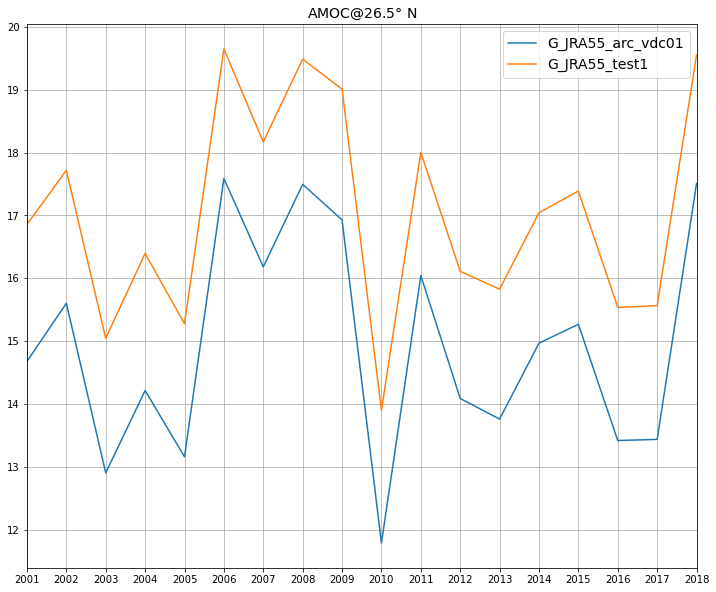

In [21]:
plt.figure(figsize=(12, 10))
plt.plot(amoc_2)
plt.plot(amoc_vdc)
plt.xlim(0, len(amoc_vdc)-1)
plt.xticks(np.arange(len(amoc_vdc)), np.arange(2001, 2018+1, 1))
plt.title(r'AMOC@26.5$\degree$ N', fontsize=14)
plt.legend(['G_JRA55_arc_vdc01', 'G_JRA55_test1'], fontsize=14)
plt.grid('--')
plt.savefig('AMOC.png', dpi=200)
plt.show()

In [3]:
def calAMOCDepth(name):
    amoc_274 = []

    amoc_275 = []
    count = 0
    moc = 0
    for y in range(44, 61+1, 1):
        for m in range(1, 12+1, 1):
            m_tmp = str(m).zfill(2)
            ds = xr.open_dataset(f"{name}{y}-{m_tmp}.nc")
            moc += np.asarray(ds['MOC'][0, 0, 0, :, :])
            count += 1
            
    amoc_274 = moc[:, 274] / count
    amoc_275 = moc[:, 275] / count

    lat = np.asarray(ds['lat_aux_grid'])
    amoc = np.asarray(amoc_274) + (26.5 - lat[274]) * (np.asarray(amoc_275) - np.asarray(amoc_274)) / (lat[275] - lat[274])
    return amoc

amoc_vdc_depth = calAMOCDepth("/work/yhtseng00/scratch/cesm2/archive/G_JRA55_arc_vdc01/ocn/hist/G_JRA55_arc_vdc01.pop.h.00")
amoc_2_depth = calAMOCDepth("/work/yhtseng00/scratch/cesm2/archive/G_JRA55_test1/ocn/hist/G_JRA55_test1.pop.h.00")


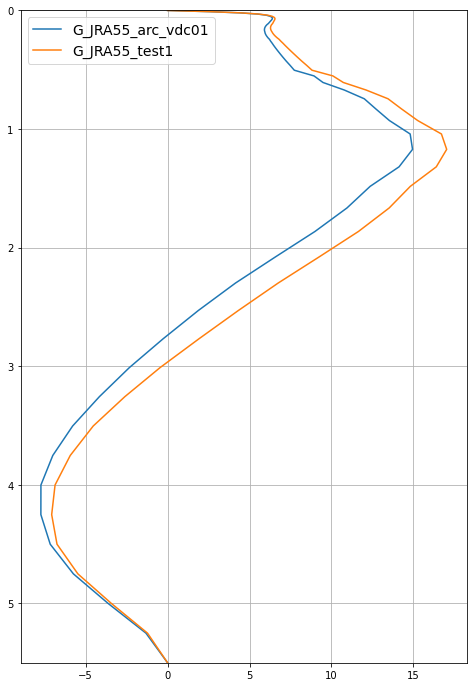

In [19]:
z = np.asarray(xr.open_dataset("/work/yhtseng00/scratch/cesm2/archive/G_JRA55_arc_vdc01/ocn/hist/G_JRA55_arc_vdc01.pop.h.0040-12.nc")['moc_z'])
z /= 100000
plt.figure(figsize=(8, 12))
plt.plot(amoc_2_depth, z)
plt.plot(amoc_vdc_depth, z)
plt.ylim(np.max(z), np.min(z))
plt.legend(['G_JRA55_arc_vdc01', 'G_JRA55_test1'], fontsize=14)
plt.grid('--')
plt.savefig('Depth.png', dpi=200)